In [ ]:
!pip install pydicom opencv-python tensorflow matplotlib

In [ ]:
from google.colab import drive

In [37]:
!gdown 10UzcW33QlV0urc-NcLQMVUJhaUFg89JC

!unzip -o image_dicom.zip -d /content/image_dicom



Downloading...
From (original): https://drive.google.com/uc?id=10UzcW33QlV0urc-NcLQMVUJhaUFg89JC
From (redirected): https://drive.google.com/uc?id=10UzcW33QlV0urc-NcLQMVUJhaUFg89JC&confirm=t&uuid=a93e5b74-8053-42b0-9627-87086987bd2f
To: /content/image_dicom.zip
100% 175M/175M [00:01<00:00, 166MB/s]
Archive:  image_dicom.zip
  inflating: /content/image_dicom/image_dicom/00eb023a60860beaab68f69907e0dc69.dicom  
  inflating: /content/image_dicom/image_dicom/01251acf915110beed9610368166337f.dicom  
  inflating: /content/image_dicom/image_dicom/010ed3d7677dbd1666cf86b9b063ba5c.dicom  
  inflating: /content/image_dicom/image_dicom/0185dde5a08c2c4abf43752bd9f11d78.dicom  
  inflating: /content/image_dicom/image_dicom/00ee38acbe4ce33e29d7050dbd5be38b.dicom  
  inflating: /content/image_dicom/image_dicom/014101c7f1d8e9991ad43e126eb9d184.dicom  
  inflating: /content/image_dicom/image_dicom/00bdfd977c95db42e507897177dc4696.dicom  
  inflating: /content/image_dicom/image_dicom/00d381730c131b6cf25

In [38]:
import os
import numpy as np
import pydicom

# Verificar los archivos en el directorio
folder_path = '/content/image_dicom'
print("Archivos en el directorio:")
print(os.listdir(folder_path))

# Verificar manualmente la lectura de un archivo DICOM
try:
    test_file = os.path.join(folder_path, os.listdir(folder_path)[0])
    test_dicom = pydicom.dcmread(test_file)
    print("Archivo DICOM cargado correctamente: ", test_file)
    print("Dimensiones de la imagen DICOM: ", test_dicom.pixel_array.shape)
except Exception as e:
    print(f"Error al leer el archivo DICOM de prueba: {e}")


Archivos en el directorio:
['00808691d1d170128ce93ea101fd91ea.dicom', '00ee38acbe4ce33e29d7050dbd5be38b.dicom', '01a458e55f7c31ab0304b9d0d2f95b8a.dicom', '003b54fbeba8d6135d64df1f2183ea6d.dicom', 'image_dicom', '00ca03a48728dbdeae1030d89ca2e7a4.dicom', '00087195a35bb9948323aa89ccb2a860.dicom', '01295d069c2f60da8d4ec0153c7162b0.dicom', '000f985efcb28afd281e3cd1b4d370ee.dicom', '00871801219b6904f1a2ef5e705a8282.dicom', '00a5a7366683915c6d847cda6f0afeb1.dicom', '0070c01cd48ef4b4824cd0e268aee4f1 (1).dicom', '0130fec492cd6783a44ee7fb6aac4256.dicom', '007f03824f391860de585b52a5ca4442 (1).dicom', '003936931b457a21e2308c496dc6034b.dicom', '00eb023a60860beaab68f69907e0dc69.dicom', '0130fec492cd6783a44ee7fb6aac4256 (1).dicom', '002da75459bb64beb2117defd68ebcd1.dicom', '00c1bbd8214e36de2b39e3ce5c089a14.dicom', '003d59d9bae7ee202157cbc697ad8221.dicom', '0095cd74d347ef4e05372aa1df37ae2b.dicom', '010ed3d7677dbd1666cf86b9b063ba5c.dicom', '0113a7044eaa7d010ef5696e6018ef73.dicom', '008a94da378ce757d9de

In [44]:
import os

folder_path = '/content/image_dicom'
dicom_files = []

for root, _, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith('.dicom'):
            file_path = os.path.join(root, file)
            dicom_files.append(file_path)

print(f"Total archivos DICOM encontrados: {len(dicom_files)}")
print("Lista de archivos DICOM:")
for file_path in dicom_files:
    print(file_path)

Total archivos DICOM encontrados: 115
Lista de archivos DICOM:
/content/image_dicom/00808691d1d170128ce93ea101fd91ea.dicom
/content/image_dicom/00ee38acbe4ce33e29d7050dbd5be38b.dicom
/content/image_dicom/01a458e55f7c31ab0304b9d0d2f95b8a.dicom
/content/image_dicom/003b54fbeba8d6135d64df1f2183ea6d.dicom
/content/image_dicom/00ca03a48728dbdeae1030d89ca2e7a4.dicom
/content/image_dicom/00087195a35bb9948323aa89ccb2a860.dicom
/content/image_dicom/01295d069c2f60da8d4ec0153c7162b0.dicom
/content/image_dicom/000f985efcb28afd281e3cd1b4d370ee.dicom
/content/image_dicom/00871801219b6904f1a2ef5e705a8282.dicom
/content/image_dicom/00a5a7366683915c6d847cda6f0afeb1.dicom
/content/image_dicom/0070c01cd48ef4b4824cd0e268aee4f1 (1).dicom
/content/image_dicom/0130fec492cd6783a44ee7fb6aac4256.dicom
/content/image_dicom/007f03824f391860de585b52a5ca4442 (1).dicom
/content/image_dicom/003936931b457a21e2308c496dc6034b.dicom
/content/image_dicom/00eb023a60860beaab68f69907e0dc69.dicom
/content/image_dicom/0130fec4

In [45]:
import hashlib

def file_hash(filepath):
    """Calculate the MD5 hash of a file."""
    hasher = hashlib.md5()
    with open(filepath, 'rb') as f:
        buf = f.read()
        hasher.update(buf)
    return hasher.hexdigest()

def remove_duplicates(folder_path):
    """Remove duplicate files in the specified folder."""
    seen_hashes = set()
    duplicate_files = []

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.dicom'):
                file_path = os.path.join(root, file)
                file_md5 = file_hash(file_path)
                if file_md5 in seen_hashes:
                    duplicate_files.append(file_path)
                else:
                    seen_hashes.add(file_md5)

    for file_path in duplicate_files:
        os.remove(file_path)
        print(f"Removed duplicate file: {file_path}")

remove_duplicates(folder_path)
len(folder_path)

Removed duplicate file: /content/image_dicom/0130fec492cd6783a44ee7fb6aac4256 (1).dicom
Removed duplicate file: /content/image_dicom/003b54fbeba8d6135d64df1f2183ea6d (1).dicom
Removed duplicate file: /content/image_dicom/0070c01cd48ef4b4824cd0e268aee4f1.dicom
Removed duplicate file: /content/image_dicom/003351cd91a49e52a5a3db5ec68961ab.dicom
Removed duplicate file: /content/image_dicom/01987a144c1089e171f208e0c87f3ee8 (1).dicom
Removed duplicate file: /content/image_dicom/image_dicom/00808691d1d170128ce93ea101fd91ea.dicom
Removed duplicate file: /content/image_dicom/image_dicom/00ee38acbe4ce33e29d7050dbd5be38b.dicom
Removed duplicate file: /content/image_dicom/image_dicom/01a458e55f7c31ab0304b9d0d2f95b8a.dicom
Removed duplicate file: /content/image_dicom/image_dicom/003b54fbeba8d6135d64df1f2183ea6d.dicom
Removed duplicate file: /content/image_dicom/image_dicom/00ca03a48728dbdeae1030d89ca2e7a4.dicom
Removed duplicate file: /content/image_dicom/image_dicom/00087195a35bb9948323aa89ccb2a86

20

In [46]:
import os
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

def load_dicom_images(folder_path, img_size=(256, 256)):
    images = []
    labels = []  # Aquí asumimos que tienes etiquetas asociadas a tus imágenes DICOM
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.dicom'):
                file_path = os.path.join(root, file)
                print(f"Intentando cargar archivo DICOM: {file_path}")  # Agregando mensaje de depuración
                try:
                    dicom_data = pydicom.dcmread(file_path)
                    image = dicom_data.pixel_array
                    if image is not None:
                        # Redimensionar la imagen a img_size
                        image = cv2.resize(image, img_size)
                        images.append(image)
                        labels.append(0)  # Aquí 0 es un placeholder, reemplázalo con la etiqueta real
                    else:
                        print(f"Advertencia: La imagen DICOM en {file_path} está vacía.")
                except Exception as e:
                    print(f"Error al leer el archivo {file_path}: {e}")
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas
folder_path = '/content/image_dicom'
images, labels = load_dicom_images(folder_path)

# Verificar si se cargaron las imágenes correctamente
if images.size == 0:
    raise ValueError("No se cargaron imágenes. Verifica que el directorio contiene archivos DICOM válidos.")

# Mostrar información sobre las imágenes cargadas
print(f"Se cargaron {len(images)} imágenes DICOM.")
print(f"Dimensiones de las imágenes: {images[0].shape} (ejemplo de la primera imagen)")


Intentando cargar archivo DICOM: /content/image_dicom/00808691d1d170128ce93ea101fd91ea.dicom


/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


Intentando cargar archivo DICOM: /content/image_dicom/00ee38acbe4ce33e29d7050dbd5be38b.dicom
Intentando cargar archivo DICOM: /content/image_dicom/01a458e55f7c31ab0304b9d0d2f95b8a.dicom
Intentando cargar archivo DICOM: /content/image_dicom/003b54fbeba8d6135d64df1f2183ea6d.dicom
Intentando cargar archivo DICOM: /content/image_dicom/00ca03a48728dbdeae1030d89ca2e7a4.dicom
Intentando cargar archivo DICOM: /content/image_dicom/00087195a35bb9948323aa89ccb2a860.dicom
Intentando cargar archivo DICOM: /content/image_dicom/01295d069c2f60da8d4ec0153c7162b0.dicom
Intentando cargar archivo DICOM: /content/image_dicom/000f985efcb28afd281e3cd1b4d370ee.dicom
Intentando cargar archivo DICOM: /content/image_dicom/00871801219b6904f1a2ef5e705a8282.dicom
Intentando cargar archivo DICOM: /content/image_dicom/00a5a7366683915c6d847cda6f0afeb1.dicom
Intentando cargar archivo DICOM: /content/image_dicom/0070c01cd48ef4b4824cd0e268aee4f1 (1).dicom
Intentando cargar archivo DICOM: /content/image_dicom/0130fec492cd

In [59]:
# Preprocesamiento de imágenes
images = images / np.max(images)  # Normalizar las imágenes

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



# Ajuste de las etiquetas para clasificación binaria
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


# Asegurarse de que las imágenes tienen el canal de color necesario (si aplica)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Imprimir la forma de X_train para verificar las dimensiones
print(f"Forma de X_train: {X_train.shape}")


input_shape = X_train.shape[1:]  # Esto tomará todas las dimensiones excepto el tamaño del lote

print(f"Forma de entrada del modelo: {input_shape}")


# Construcción de la red neuronal multicapa grande
model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Asumiendo clasificación binaria
])

Forma de X_train: (44, 256, 256, 1)
Forma de entrada del modelo: (256, 256, 1)


Epoch 1/20
2/2 [==============================] - 4s 790ms/step - loss: 1.8172e-20 - accuracy: 1.0000 - val_loss: 7.8986e-34 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 1s 595ms/step - loss: 1.8172e-20 - accuracy: 1.0000 - val_loss: 7.8986e-34 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 1s 575ms/step - loss: 1.8172e-20 - accuracy: 1.0000 - val_loss: 7.8986e-34 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 1s 590ms/step - loss: 1.8172e-20 - accuracy: 1.0000 - val_loss: 7.8986e-34 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 1s 608ms/step - loss: 1.8172e-20 - accuracy: 1.0000 - val_loss: 7.8986e-34 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 1s 614ms/step - loss: 1.8172e-20 - accuracy: 1.0000 - val_loss: 7.8986e-34 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 1s 607ms/step - loss: 1.8172e-20 - accuracy: 1.0000 - val_loss

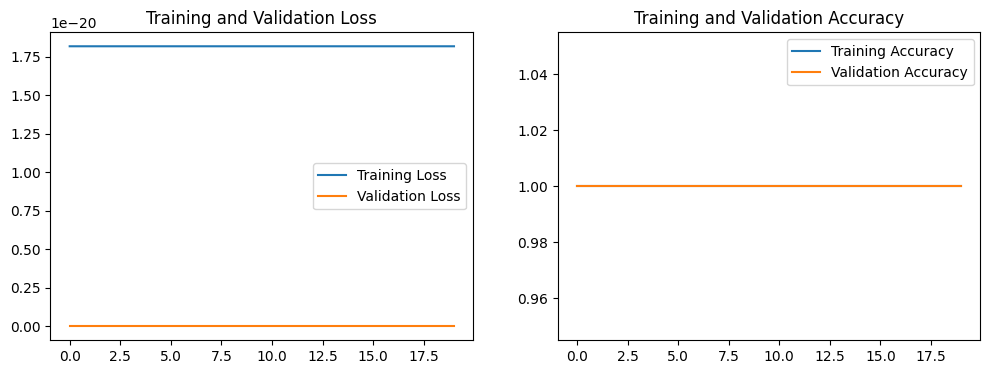

In [70]:

 #Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

Epoch 1/20
2/2 [==============================] - 1s 334ms/step - loss: 0.5175 - accuracy: 0.2727 - val_loss: 2.0709e-05 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 168ms/step - loss: 1.6675e-04 - accuracy: 1.0000 - val_loss: 2.5015e-08 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 161ms/step - loss: 2.9067e-06 - accuracy: 1.0000 - val_loss: 1.3128e-10 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 151ms/step - loss: 3.2962e-08 - accuracy: 1.0000 - val_loss: 1.8653e-12 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 166ms/step - loss: 9.7761e-09 - accuracy: 1.0000 - val_loss: 5.5190e-14 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 165ms/step - loss: 4.8972e-10 - accuracy: 1.0000 - val_loss: 2.9987e-15 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 157ms/step - loss: 2.1426e-10 - accuracy: 1.0000 - val_loss: 2.

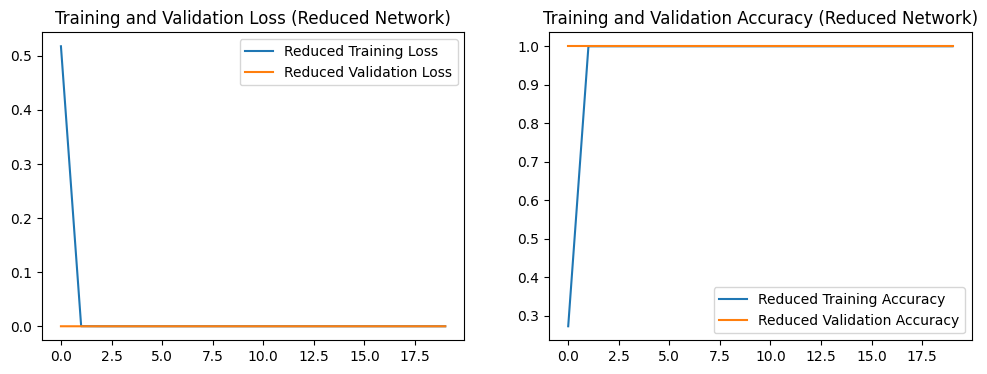

In [61]:
#Reducccion de la red.

model_reduced = Sequential([
    Flatten(input_shape=(input_shape)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Asumiendo clasificación binaria
])

# Compilar el modelo reducido
model_reduced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo reducido
history_reduced = model_reduced.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Graficar la pérdida y la precisión para el modelo reducido
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_reduced.history['loss'], label='Reduced Training Loss')
plt.plot(history_reduced.history['val_loss'], label='Reduced Validation Loss')
plt.legend()
plt.title('Training and Validation Loss (Reduced Network)')

plt.subplot(1, 2, 2)
plt.plot(history_reduced.history['accuracy'], label='Reduced Training Accuracy')
plt.plot(history_reduced.history['val_accuracy'], label='Reduced Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Reduced Network)')

plt.show()




Epoch 1/20
2/2 [==============================] - 3s 871ms/step - loss: 2.0873 - accuracy: 1.0000 - val_loss: 1.5283 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 1s 682ms/step - loss: 1.5171 - accuracy: 1.0000 - val_loss: 1.4490 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 1s 682ms/step - loss: 1.4396 - accuracy: 1.0000 - val_loss: 1.3832 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 1s 686ms/step - loss: 1.3755 - accuracy: 1.0000 - val_loss: 1.3296 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 1s 693ms/step - loss: 1.3231 - accuracy: 1.0000 - val_loss: 1.2832 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 1s 699ms/step - loss: 1.2771 - accuracy: 1.0000 - val_loss: 1.2385 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 2s 992ms/step - loss: 1.2321 - accuracy: 1.0000 - val_loss: 1.1910 - val_accuracy: 1.0000
Epoch 8/20
2/2 [====

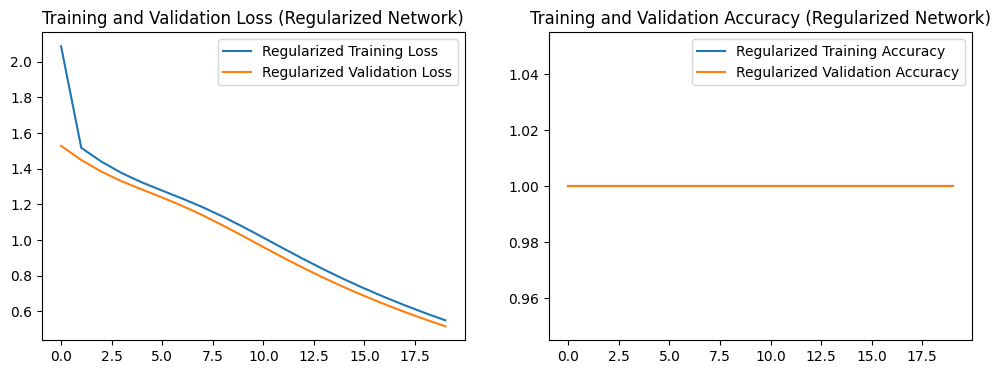

In [65]:
#Regularizacion
from tensorflow.keras.regularizers import l2
# Aplicación de regularización L2
model_regularized = Sequential([
    Flatten(input_shape=(input_shape)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')  # Asumiendo clasificación binaria
])

# Compilar el modelo regularizado
model_regularized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo regularizado
history_regularized = model_regularized.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Graficar la pérdida y la precisión para el modelo regularizado
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_regularized.history['loss'], label='Regularized Training Loss')
plt.plot(history_regularized.history['val_loss'], label='Regularized Validation Loss')
plt.legend()
plt.title('Training and Validation Loss (Regularized Network)')

plt.subplot(1, 2, 2)
plt.plot(history_regularized.history['accuracy'], label='Regularized Training Accuracy')
plt.plot(history_regularized.history['val_accuracy'], label='Regularized Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Regularized Network)')

plt.show()


Epoch 1/20
2/2 [==============================] - 3s 765ms/step - loss: 0.7088 - accuracy: 0.5909 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 1s 560ms/step - loss: 1.4164 - accuracy: 0.9318 - val_loss: 5.9181e-05 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 1s 572ms/step - loss: 0.1545 - accuracy: 0.9318 - val_loss: 2.2965e-06 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 1s 611ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 7.3941e-08 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 1s 734ms/step - loss: 0.1559 - accuracy: 0.9545 - val_loss: 2.3776e-09 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 2s 844ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 8.0465e-11 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 2s 881ms/step - loss: 0.0295 - accuracy: 0.9773 - val_loss: 2.8978e-12 - val_accuracy: 1.0

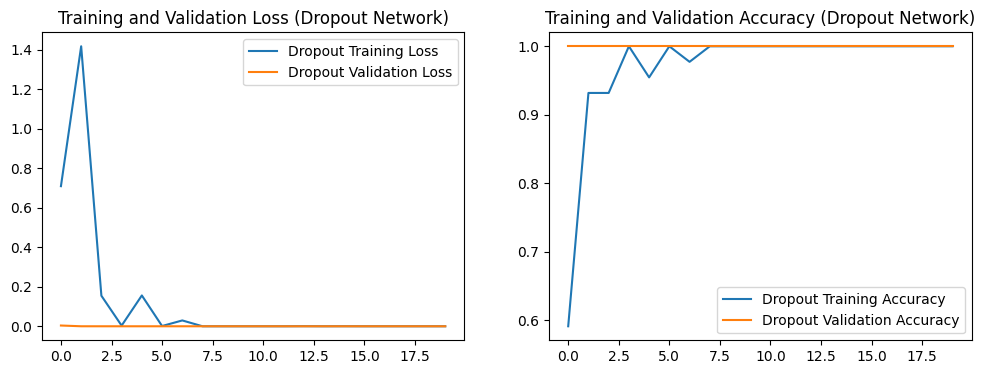

In [69]:
#Dropout
# Aplicación de dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.layers import Dropout


model_dropout = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Asumiendo clasificación binaria
])

# Compilar el modelo con dropout
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con dropout
history_dropout = model_dropout.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Graficar la pérdida y la precisión para el modelo con dropout
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Dropout Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Dropout Validation Loss')
plt.legend()
plt.title('Training and Validation Loss (Dropout Network)')

plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['accuracy'], label='Dropout Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Dropout Network)')

plt.show()


In [ ]:
#Conclusion:

#Se determina que utilizando la regularizacion, podemos generar una red neuronal que aprende por si misma. En si hay un problema con el accuracy, pero esto se debe a las cantidades
# de imagenes que hemos tomado (55 en este caso). Con una cantidad mas grande de imagenes, estas gráficas de comparación de accuracy cambiarían.